# Filipino Housing Regression
## DATA 401

In [247]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Engineering
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression, LassoCV, Lasso

# Model Selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

# Model Storage
from sklearn.externals import joblib

# NN
import keras as k

In [159]:
train_data = pd.read_csv("/data/project2/train.csv")
test_data = pd.read_csv("/data/project2/test.csv")
print("Train Data Rows: ", len(train_data))
print("Test Data Rows: ", len(test_data))

Train Data Rows:  33235
Test Data Rows:  8309


In [160]:
train_data.head(2)

,Index,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Total Household Income
0,22617,CAR,81940,Enterpreneurial Activities,1,44171,40336,9053,4499,5245,6625,2410,145,0,1769,12300,3600,544,2700,636,0,5466,5150,22300,46100,Male,63,Married,Elementary Graduate,With Job/Business,Carpenters and joiners,Worked for private establishment,Extended Family,6,2,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,342,30,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Protected spring, river, stream, etc",0,0,0,0,1,0,0,0,2,0,0,0,0,115835
1,21389,V - Bicol Region,26176,Other sources of Income,0,14477,13067,722,3707,755,1560,260,280,235,1725,5502,3600,813,228,138,0,4722,0,0,5460,Male,73,Married,No Grade Completed,With Job/Business,Inland and coastal waters fishermen,Self-employed wihout any employee,Single Family,2,0,0,1,Single house,"Light material (cogon,nipa,anahaw)",Light,20,3,0,"Own house, rent-free lot with consent of owner","Water-sealed, sewer septic tank, shared with o...",0,"Own use, tubed/piped deep well",0,0,0,0,0,0,0,0,0,0,0,0,0,44339


In [161]:
numerics = ['object']

newdf = train_data.select_dtypes(include=numerics)
newdf.columns

Index(['Region', 'Main Source of Income', 'Household Head Sex',
       'Household Head Marital Status',
       'Household Head Highest Grade Completed',
       'Household Head Job or Business Indicator', 'Household Head Occupation',
       'Household Head Class of Worker', 'Type of Household',
       'Type of Building/House', 'Type of Roof', 'Type of Walls',
       'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply'],
      dtype='object')

In [545]:
response_variable = 'Total Household Income'

continuous_vars = ['Total Food Expenditure', 
                   'Bread and Cereals Expenditure', 'Total Rice Expenditure',
                   'Meat Expenditure', 'Total Fish and  marine products Expenditure',
                   'Fruit Expenditure', 'Vegetables Expenditure',
                   'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
                   'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
                   'Housing and water Expenditure', 'Imputed House Rental Value',
                   'Medical Care Expenditure', 'Transportation Expenditure','Communication Expenditure', 'Education Expenditure',
                   'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
                   'Total Income from Entrepreneurial Acitivites', 'House Floor Area']

nominal_vars = ['Agricultural Household indicator', 'Region', 'Main Source of Income', 
                'Household Head Sex','Household Head Marital Status',
                'Household Head Highest Grade Completed',
                'Household Head Job or Business Indicator', 'Household Head Occupation',
                'Household Head Class of Worker', 'Type of Household',
                'Type of Building/House', 'Type of Roof', 'Type of Walls',
                'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply']

binary_vars =  ['Electricity']

ordinal_vars = ['Household Head Age','Number of bedrooms','House Age','Number of Television', 'Number of CD/VCD/DVD',
                'Total Number of Family members','Number of Component/Stereo set', 'Number of Refrigerator/Freezer',
                'Number of Washing Machine', 'Number of Airconditioner',
                'Number of Car, Jeep, Van', 'Number of Landline/wireless telephones',
                'Number of Cellular phone', 'Number of Personal Computer',
                'Number of Stove with Oven/Gas Range', 'Number of Motorized Banca',
                'Number of Motorcycle/Tricycle','Members with age less than 5 year old','Members with age 5 - 17 years old','Total number of family members employed'] 

In [546]:
train_continuous = train_data[continuous_vars]
train_categorical = train_data[nominal_vars + binary_vars]
train_ordinal = train_data[ordinal_vars]
train_y = train_data[response_variable]

## Exploratory Analysis

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


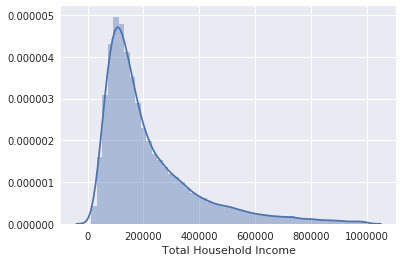

In [245]:
sns.distplot(train_y[train_y < 1000000])

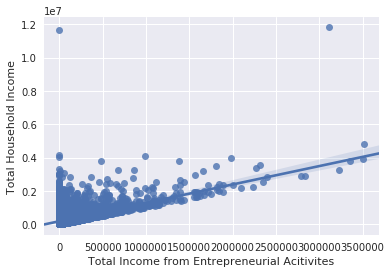

In [431]:
sns.regplot(x='Total Income from Entrepreneurial Acitivites', y='Total Household Income', data=train_data[train_data['Total Income from Entrepreneurial Acitivites'] < 4000000])

***

***

***

# Linear Regression

## Model 1 - Numeric Only

In [164]:
print("Columns =", len(train_continuous.columns))
train_continuous.head(3)

Columns = 22


,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,House Floor Area
0,81940,44171,40336,9053,4499,5245,6625,2410,145,0,1769,12300,3600,544,2700,636,0,5466,5150,22300,46100,342
1,26176,14477,13067,722,3707,755,1560,260,280,235,1725,5502,3600,813,228,138,0,4722,0,0,5460,20
2,139920,31053,21720,12005,10415,1090,6355,65642,210,2715,4050,29520,12000,1734,24846,2004,5460,7578,4500,0,167900,75


#### Model Selection

In [338]:
numeric_model_lasso = lassoChoose(train_continuous, train_y)
print("Total variables kept:", sum(numeric_model_lasso.coef_ != 0))

Total variables kept: 19


In [339]:
numeric_model_lasso.predict(StandardScaler().fit_transform(train_continuous))

array([ 148393.81264468,   47598.77968371,  334522.37754223, ...,
        152693.90233638,  261938.11586215,  455773.5252636 ])

In [373]:
# Top 10 Vars
final_numeric_var = pd.DataFrame([combo for combo in zip(numeric_model_lasso.coef_, continuous_vars)], columns = ['Beta Estimate', 'Candidate Variable']).sort_values(by = 'Beta Estimate', ascending = False)
final_numeric_var.head(10)

,Beta Estimate,Candidate Variable
20,90549.137997,Total Income from Entrepreneurial Acitivites
17,54606.849149,Miscellaneous Goods and Services Expenditure
11,41134.004104,Housing and water Expenditure
15,36078.049374,Communication Expenditure
14,28718.248528,Transportation Expenditure
0,24797.881193,Total Food Expenditure
13,22662.534313,Medical Care Expenditure
12,20354.627394,Imputed House Rental Value
10,19445.715740,"Clothing, Footwear and Other Wear Expenditure"
18,18042.854207,Special Occasions Expenditure


In [332]:
print("All variables CV MSE", -np.average(cross_val_score(LinearRegression(), train_continuous, train_y, cv = 10, scoring = "neg_mean_squared_error")))
print("Lasso CV MSE", -np.average(cross_val_score(numeric_model_lasso, StandardScaler().fit_transform(train_continuous), train_y, cv = 10, scoring = "neg_mean_squared_error")))

All variables CV MSE 16763020268.2
Lasso CV MSE 16752140988.2


In [324]:
joblib.dump(numeric_model_lasso, 'numeric_only_model.pkl')

['numeric_only_model.pkl']

***

## Model 2 - Categorical Only

In [548]:
train_categorical_dummied = dummyify(train_categorical, nominal_vars)

# Takes a couple minutes
train_ordinal_encoded = rank_hot_encode(train_ordinal, ordinal_vars)

In [552]:
all_categorical = train_categorical_dummied.join(train_ordinal_encoded)
print("# Columns =", len(all_categorical.columns))
all_categorical.head(3)

# Columns = 798


,Electricity,Agricultural Household indicator_1,Agricultural Household indicator_2,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,Region_NCR,Region_V - Bicol Region,Region_VI - Western Visayas,Region_VII - Central Visayas,Region_VIII - Eastern Visayas,Region_X - Northern Mindanao,Region_XI - Davao Region,Region_XII - SOCCSKSARGEN,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Male,Household Head Marital Status_Divorced/Separated,Household Head Marital Status_Married,Household Head Marital Status_Single,Household Head Marital Status_Unknown,Household Head Marital Status_Widowed,Household Head Highest Grade Completed_Architecture and Building Programs,Household Head Highest Grade Completed_Arts Programs,Household Head Highest Grade Completed_Basic Programs,Household Head Highest Grade Completed_Business and Administration Programs,Household Head Highest Grade Completed_Computing/Information Technology Programs,Household Head Highest Grade Completed_Elementary Graduate,Household Head Highest Grade Completed_Engineering and Engineering Trades Programs,Household Head Highest Grade Completed_Engineering and Engineering trades Programs,Household Head Highest Grade Completed_Environmental Protection Programs,Household Head Highest Grade Completed_First Year College,Household Head Highest Grade Completed_First Year High School,Household Head Highest Grade Completed_First Year Post Secondary,Household Head Highest Grade Completed_Fourth Year College,Household Head Highest Grade Completed_Grade 1,Household Head Highest Grade Completed_Grade 2,Household Head Highest Grade Completed_Grade 3,Household Head Highest Grade Completed_Grade 4,Household Head Highest Grade Completed_Grade 5,Household Head Highest Grade Completed_Grade 6,Household Head Highest Grade Completed_Health Programs,Household Head Highest Grade Completed_High School Graduate,Household Head Highest Grade Completed_Humanities Programs,Household Head Highest Grade Completed_Journalism and Information Programs,Household Head Highest Grade Completed_Law Programs,Household Head Highest Grade Completed_Life Sciences Programs,Household Head Highest Grade Completed_Manufacturing and Processing Programs,Household Head Highest Grade Completed_Mathematics and Statistics Programs,Household Head Highest Grade Completed_No Grade Completed,"Household Head Highest Grade Completed_Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree","Household Head Highest Grade Completed_Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)",Household Head Highest Grade Completed_Personal Services Programs,Household Head Highest Grade Completed_Physical Sciences Programs,Household Head Highest Grade Completed_Post Baccalaureate,Household Head Highest Grade Completed_Preschool,Household Head Highest Grade Completed_Second Year College,Household Head Highest Grade Completed_Second Year High School,Household Head Highest Grade Completed_Second Year Post Secondary,Household Head Highest Grade Completed_Security Services Programs,Household Head Highest Grade Completed_Social Services Programs,Household Head Highest Grade Completed_Social and Behavioral Science Programs,Household Head Highest Grade Completed_Teacher Training and Education Sciences Programs,Household Head Highest Grade Completed_Third Year College,Household Head Highest Grade Completed_Third Year High School,Household Head Highest Grade Completed_Transport Services Programs,Household Head Highest Grade Completed_Veterinary Programs,Household Head Job or Business Indicator_With Job/Business,Household He

#### Model Selection

In [553]:
categorical_model_lasso = lassoChoose(all_categorical, train_y, standardize = False, max_iterations = 3000)
print("Total variables kept:",sum(categorical_model_lasso.coef_ != 0))

Total variables kept: 197


In [554]:
categorical_model_lasso.predict(all_categorical)

array([ 192854.84504276,   65415.92021094,  131511.6566171 , ...,
        178070.14687103,  270182.21130268,  589133.28218495])

In [558]:
# Top 10 Vars
final_categorical_var = pd.DataFrame([combo for combo in zip(categorical_model_lasso.coef_,  all_categorical.columns)], columns = ['Beta Estimate', 'Candidate Variable']).sort_values(by = 'Beta Estimate', ascending = False)
final_categorical_var.head(10)

,Beta Estimate,Candidate Variable
744,852907.989108,"Number of Car, Jeep, Van_4"
738,234093.302418,Number of Airconditioner_3
50,211556.684655,Household Head Highest Grade Completed_Law Pro...
742,187396.955262,"Number of Car, Jeep, Van_2"
59,182019.014095,Household Head Highest Grade Completed_Post Ba...
763,148604.258794,Number of Personal Computer_4
739,146341.374662,Number of Airconditioner_4
741,132672.463176,"Number of Car, Jeep, Van_1"
743,127429.261580,"Number of Car, Jeep, Van_3"
250,108965.293648,Household Head Occupation_Medical doctors


In [560]:
print("All variables CV MSE", -np.average(cross_val_score(LinearRegression(), all_categorical, train_y, cv = 10, scoring = "neg_mean_squared_error")))
print("Lasso CV MSE", -np.average(cross_val_score(categorical_model_lasso, all_categorical, train_y, cv = 10, scoring = "neg_mean_squared_error")))

All variables CV MSE 4.47101961182e+30
Lasso CV MSE 35464732037.7


In [561]:
joblib.dump(categorical_model_lasso, 'categorical_only_model.pkl')

['categorical_only_model.pkl']

***

## Model 3 - All Original Features

In [392]:
scaled_numeric = pd.DataFrame(StandardScaler().fit_transform(train_continuous), columns = continuous_vars)
train_all_scaled = scaled_numeric.join(train_categorical_dummied)
print("# Columns =", len(train_all.columns))
train_all_scaled.head(2)

# Columns = 820


,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,House Floor Area,Electricity,Agricultural Household indicator_1,Agricultural Household indicator_2,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,Region_NCR,Region_V - Bicol Region,Region_VI - Western Visayas,Region_VII - Central Visayas,Region_VIII - Eastern Visayas,Region_X - Northern Mindanao,Region_XI - Davao Region,Region_XII - SOCCSKSARGEN,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Male,Household Head Marital Status_Divorced/Separated,Household Head Marital Status_Married,Household Head Marital Status_Single,Household Head Marital Status_Unknown,Household Head Marital Status_Widowed,Household Head Highest Grade Completed_Architecture and Building Programs,Household Head Highest Grade Completed_Arts Programs,Household Head Highest Grade Completed_Basic Programs,Household Head Highest Grade Completed_Business and Administration Programs,Household Head Highest Grade Completed_Computing/Information Technology Programs,Household Head Highest Grade Completed_Elementary Graduate,Household Head Highest Grade Completed_Engineering and Engineering Trades Programs,Household Head Highest Grade Completed_Engineering and Engineering trades Programs,Household Head Highest Grade Completed_Environmental Protection Programs,Household Head Highest Grade Completed_First Year College,Household Head Highest Grade Completed_First Year High School,Household Head Highest Grade Completed_First Year Post Secondary,Household Head Highest Grade Completed_Fourth Year College,Household Head Highest Grade Completed_Grade 1,Household Head Highest Grade Completed_Grade 2,Household Head Highest Grade Completed_Grade 3,Household Head Highest Grade Completed_Grade 4,Household Head Highest Grade Completed_Grade 5,Household Head Highest Grade Completed_Grade 6,Household Head Highest Grade Completed_Health Programs,Household Head Highest Grade Completed_High School Graduate,Household Head Highest Grade Completed_Humanities Programs,Household Head Highest Grade Completed_Journalism and Information Programs,Household Head Highest Grade Completed_Law Programs,Household Head Highest Grade Completed_Life Sciences Programs,Household Head Highest Grade Completed_Manufacturing and Processing Programs,Household Head Highest Grade Completed_Mathematics and Statistics Programs,Household Head Highest Grade Completed_No Grade Completed,"Household Head Highest Grade Completed_Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree","Household Head Highest Grade Completed_Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)",Household Head Highest Grade Completed_Personal Services Programs,Household Head Highest Grade Completed_Physical Sciences Programs,Household Head Highest Grade Completed_Post Baccalaureate,Household Head Highest Grade Completed_Preschool,Household Head Highest Grade Completed_Second Year College,Household Head Highest Grade Completed_Second Year High School,Household Head Highest Grade Completed

#### Model Selection

In [416]:
all_var_model_lasso = lassoChoose(train_all_scaled, train_y, standardize = False, max_iterations = 3000)
print("Total variables kept:",sum(all_var_model_lasso.coef_ != 0))

Total variables kept: 97


In [395]:
all_var_model_lasso.predict(train_all_scaled)

array([ 104493.85169865,   56235.05893432,  270549.98119675, ...,
        139365.51629749,  174681.53759095,  460151.91708156])

In [394]:
final_model3_var = pd.DataFrame([combo for combo in zip(all_var_model_lasso.coef_, train_all_scaled.columns)], columns = ['Beta Estimate', 'Candidate Variable']).sort_values(by = 'Beta Estimate', ascending = False)
final_model3_var.head(10)

,Beta Estimate,Candidate Variable
20,105036.051939,Total Income from Entrepreneurial Acitivites
785,64529.578930,Number of Personal Computer_4
42,63628.240895,Main Source of Income_Wage/Salaries
41,59575.643935,Main Source of Income_Other sources of Income
81,59021.864757,Household Head Highest Grade Completed_Post Ba...
815,52860.933019,Total number of family members employed_4
717,51906.259704,Number of Television_4
17,46066.830597,Miscellaneous Goods and Services Expenditure
760,45264.448054,Number of Airconditioner_3
816,42917.151148,Total number of family members employed_5


In [396]:
print("All variables CV MSE", -np.average(cross_val_score(LinearRegression(), train_all_scaled, train_y, cv = 10, scoring = "neg_mean_squared_error")))
print("Lasso CV MSE", -np.average(cross_val_score(all_var_model_lasso, train_all_scaled, train_y, cv = 10, scoring = "neg_mean_squared_error")))

All variables CV MSE 1.04686632744e+30
Lasso CV MSE 15311862826.0


In [386]:
joblib.dump(all_var_model_lasso, 'all_original_model.pkl')

['all_original_model.pkl']

***

## Model 4 - Any Features

In [463]:
train_all = pd.DataFrame(StandardScaler().fit_transform(train_continuous), columns = train_continuous.columns).join(train_categorical_dummied)
print("# Columns =", len(train_all.columns))
train_all.head(2)

# Columns = 820


,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,House Floor Area,Electricity,Agricultural Household indicator_1,Agricultural Household indicator_2,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,Region_NCR,Region_V - Bicol Region,Region_VI - Western Visayas,Region_VII - Central Visayas,Region_VIII - Eastern Visayas,Region_X - Northern Mindanao,Region_XI - Davao Region,Region_XII - SOCCSKSARGEN,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Male,Household Head Marital Status_Divorced/Separated,Household Head Marital Status_Married,Household Head Marital Status_Single,Household Head Marital Status_Unknown,Household Head Marital Status_Widowed,Household Head Highest Grade Completed_Architecture and Building Programs,Household Head Highest Grade Completed_Arts Programs,Household Head Highest Grade Completed_Basic Programs,Household Head Highest Grade Completed_Business and Administration Programs,Household Head Highest Grade Completed_Computing/Information Technology Programs,Household Head Highest Grade Completed_Elementary Graduate,Household Head Highest Grade Completed_Engineering and Engineering Trades Programs,Household Head Highest Grade Completed_Engineering and Engineering trades Programs,Household Head Highest Grade Completed_Environmental Protection Programs,Household Head Highest Grade Completed_First Year College,Household Head Highest Grade Completed_First Year High School,Household Head Highest Grade Completed_First Year Post Secondary,Household Head Highest Grade Completed_Fourth Year College,Household Head Highest Grade Completed_Grade 1,Household Head Highest Grade Completed_Grade 2,Household Head Highest Grade Completed_Grade 3,Household Head Highest Grade Completed_Grade 4,Household Head Highest Grade Completed_Grade 5,Household Head Highest Grade Completed_Grade 6,Household Head Highest Grade Completed_Health Programs,Household Head Highest Grade Completed_High School Graduate,Household Head Highest Grade Completed_Humanities Programs,Household Head Highest Grade Completed_Journalism and Information Programs,Household Head Highest Grade Completed_Law Programs,Household Head Highest Grade Completed_Life Sciences Programs,Household Head Highest Grade Completed_Manufacturing and Processing Programs,Household Head Highest Grade Completed_Mathematics and Statistics Programs,Household Head Highest Grade Completed_No Grade Completed,"Household Head Highest Grade Completed_Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree","Household Head Highest Grade Completed_Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)",Household Head Highest Grade Completed_Personal Services Programs,Household Head Highest Grade Completed_Physical Sciences Programs,Household Head Highest Grade Completed_Post Baccalaureate,Household Head Highest Grade Completed_Preschool,Household Head Highest Grade Completed_Second Year College,Household Head Highest Grade Completed_Second Year High School,Household Head Highest Grade Completed

In [464]:
def transform_x(df):
    #df = log_transform(train_all, continuous_vars)
    df = expand_var(train_all, continuous_vars, 3)
    return df

In [465]:
train_all = transform_x(train_all)

In [466]:
train_all.head(5)

,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,House Floor Area,Electricity,Agricultural Household indicator_1,Agricultural Household indicator_2,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,Region_NCR,Region_V - Bicol Region,Region_VI - Western Visayas,Region_VII - Central Visayas,Region_VIII - Eastern Visayas,Region_X - Northern Mindanao,Region_XI - Davao Region,Region_XII - SOCCSKSARGEN,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Male,Household Head Marital Status_Divorced/Separated,Household Head Marital Status_Married,Household Head Marital Status_Single,Household Head Marital Status_Unknown,Household Head Marital Status_Widowed,Household Head Highest Grade Completed_Architecture and Building Programs,Household Head Highest Grade Completed_Arts Programs,Household Head Highest Grade Completed_Basic Programs,Household Head Highest Grade Completed_Business and Administration Programs,Household Head Highest Grade Completed_Computing/Information Technology Programs,Household Head Highest Grade Completed_Elementary Graduate,Household Head Highest Grade Completed_Engineering and Engineering Trades Programs,Household Head Highest Grade Completed_Engineering and Engineering trades Programs,Household Head Highest Grade Completed_Environmental Protection Programs,Household Head Highest Grade Completed_First Year College,Household Head Highest Grade Completed_First Year High School,Household Head Highest Grade Completed_First Year Post Secondary,Household Head Highest Grade Completed_Fourth Year College,Household Head Highest Grade Completed_Grade 1,Household Head Highest Grade Completed_Grade 2,Household Head Highest Grade Completed_Grade 3,Household Head Highest Grade Completed_Grade 4,Household Head Highest Grade Completed_Grade 5,Household Head Highest Grade Completed_Grade 6,Household Head Highest Grade Completed_Health Programs,Household Head Highest Grade Completed_High School Graduate,Household Head Highest Grade Completed_Humanities Programs,Household Head Highest Grade Completed_Journalism and Information Programs,Household Head Highest Grade Completed_Law Programs,Household Head Highest Grade Completed_Life Sciences Programs,Household Head Highest Grade Completed_Manufacturing and Processing Programs,Household Head Highest Grade Completed_Mathematics and Statistics Programs,Household Head Highest Grade Completed_No Grade Completed,"Household Head Highest Grade Completed_Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree","Household Head Highest Grade Completed_Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)",Household Head Highest Grade Completed_Personal Services Programs,Household Head Highest Grade Completed_Physical Sciences Programs,Household Head Highest Grade Completed_Post Baccalaureate,Household Head Highest Grade Completed_Preschool,Household Head Highest Grade Completed_Second Year College,Household Head Highest Grade Completed_Second Year High School,Household Head Highest Grade Completed

#### Model 4 - Model Selection

In [467]:
final_model = lassoChoose(train_all, train_y, standardize = False, max_iterations = 3000)
print("Total variables kept:",sum(all_var_model_lasso.coef_ != 0))

Total variables kept: 14


In [468]:
final_model.predict(train_all)

array([ 226000.20826285,  213651.61494714,  216091.33605086, ...,
        214267.23730716,  212555.39943132,  241909.50050628])

In [469]:
final_model_var = pd.DataFrame([coefs for coefs in zip(final_model.coef_, train_all.columns)], columns = ['Beta Estimate', 'Candidate Variable']).sort_values(by = 'Beta Estimate', ascending = False)
final_model_var.head(10)

,Beta Estimate,Candidate Variable
850,9772.623882,Communication Expenditure^2
854,8215.872404,Miscellaneous Goods and Services Expenditure^2
860,7499.522373,Total Income from Entrepreneurial Acitivites^2
852,3660.726069,Education Expenditure^2
842,3166.413366,Housing and water Expenditure^2
848,2985.783438,Transportation Expenditure^2
840,1482.652337,"Clothing, Footwear and Other Wear Expenditure^2"
821,1426.303099,Total Food Expenditure^3
844,1188.805084,Imputed House Rental Value^2
856,1065.821167,Special Occasions Expenditure^2


In [470]:
print("All variables CV MSE", -np.average(cross_val_score(LinearRegression(), train_all, train_y, cv = 10, scoring = "neg_mean_squared_error")))
print("Lasso CV MSE", -np.average(cross_val_score(final_model, train_all, train_y, cv = 10, scoring = "neg_mean_squared_error")))

All variables CV MSE 6.09638933959e+20


/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso CV MSE 51548208430.8


***

***

# Neural Net

## Model 1 - Numeric Only

In [ ]:
train_continuous

## Model 2 - Categorical Only

In [ ]:
train_categorical_dummied

## Model 3 - All Features

In [ ]:
train_all

## Model 4 - Any Features

***

***

***

## Functions

In [337]:
def lassoChoose(X, 
                y,
                standardize = True,
                max_iterations = 1000):
    
    if(standardize):
        X = StandardScaler().fit_transform(X)
    return LassoCV(max_iter = max_iterations).fit(X, y)

In [114]:
def dummyify(df, 
             cols_to_dummy = []
            ):
    """
    DESCRIPTION:
        * Converts a categorical variable in a Pandas DataFrame to dummy/indicator variables.
          Drops one of the dummy columns to create our baseline for modeling. 
          Drops original column containing categorical variable.
        
    PARAMS:
        * df            --> Pandas DataFrame containing data.
        * col_to_dummy  --> The name of the categorical variable to convert to a dummy variable.
        * col_to_drop   --> The name of one of the dummy variable columns to drops. 
                            Defaults to the first value of col_to_dummy.
        
    RETURNS:
        Pandas DataFrame with the categorical variable converted to dummy variables.
    """
    
    if not cols_to_dummy:
        raise ValueError("Please provide column to dummy")
        
    for col in cols_to_dummy:
        dummies = pd.get_dummies( df[col] )
        
        new_cols = [col + '_' + str(old_col) for old_col in dummies.columns] # Have to do this for ordinal variables
        dummies.columns = new_cols 
        col_to_drop = dummies.columns[0]

        df = pd.concat( [df, dummies], axis=1 ).drop( [col_to_drop, col], axis=1 )

    return df

In [543]:
def rank_hot_encode(df, 
                    cols_to_encode = []
                   ):
    """
    DESCRIPTION:
        * Converts ordinal variables in a Pandas DataFrame to continuous variables.
          Drops one of the dummy columns to create our baseline for modeling. 
          Drops original column containing categorical variable.
        
    PARAMS:
        * df            --> Pandas DataFrame containing data.
        * col_to_dummy  --> The name of the ordinal variable to convert to a dummy variable.
        
    RETURNS:
        Pandas DataFrame with the categorical variable converted to dummy variables.
    """
    for col_to_encode in cols_to_encode:
        dummied = pd.get_dummies(df[col_to_encode], drop_first = True)
        encoded_values = dummied.columns
        
        for index in range(0, len(dummied)):
            row = dummied.loc[index]
            if(sum(row) == 0):
                continue
            for col in encoded_values:
                if(row[col] == 0):
                    row[col] = 1
                else:
                    break

        new_cols = [col_to_encode + '_' + str(old_col) for old_col in dummied.columns]
        dummied.columns = new_cols 
        
        df = pd.concat( [df, dummied], axis=1 ).drop( [col_to_encode], axis=1 )
    return df

In [399]:
def expand_var(df, 
               variable_names = [],
               n_expansion = 3):
    """
    DESCRIPTION:
        * Expands a quantitative varible(s) in a Pandas DataFrame to the nth power.
          Creates a new column for each expanded term(s).
        
    PARAMS:
        * df              --> Pandas DataFrame containing variable(s) to expand.
        * variable_names  --> An array specifying the name(s) of the quantitative variable(s) to expand.
        * n_expansion     --> The degree to which we will expand our variable(s) up to.
        
    RETURNS:
        Pandas DataFrame with the variable expanded to the specified term.
    """
    
    if variable_names == []:
        raise ValueError("Please specify variable_names to expand")
    
    for variable in variable_names:
        for i in range(2, n_expansion+1): 
            expanded_name = (variable + "^%d") % i
            df[expanded_name] = df[variable] ** i
        
    return df

In [415]:
def log_transform(df, 
                  variable_names = []
                 ):
    """
    DESCRIPTION:
        * Expands a quantitative varible(s) in a Pandas DataFrame to the nth power.
          Creates a new column for each expanded term(s).
        
    PARAMS:
        * df              --> Pandas DataFrame containing variable(s) to expand.
        * variable_names  --> An array specifying the name(s) of the quantitative variable(s) to expand.
        * n_expansion     --> The degree to which we will expand our variable(s) up to.
        
    RETURNS:
        Pandas DataFrame with the variable expanded to the specified term.
    """
    
    if variable_names == []:
        raise ValueError("Please specify variable_names to log")
    
    for variable in variable_names: 
        log_name = (variable + "_log")
        df[log_name] = np.log10(df[variable] + 1)
        
    return df

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  

def backwards_stepwise(model,
                       train,
                       test):
    """
    DESCRIPTION:
        * Given a model and training/test data, finds the optimal features to include in our model.
          Starts with every variable in the model. Trys to remove them one-by-one if it will improve score.
        
    PARAMS:
        * model    --> A model compatible with sklearn.model_selection.cross_val_score
        * train    --> Our training data.
        * test     --> Our test data.

    RETURNS:
        The optimized feature column names and the optimized score.
    """
    score_to_beat = score_model(model, train, test, scorer = scorer, weights = weights, cv = 10)
    print(score_to_beat[0])
    while(1):
        col_to_drop = ''    
        for feature in train.columns.tolist():
            scorer = MultiScorer({                                        
                'accuracy': (accuracy_score, {}),
                'precision': (precision_score, {}),
                'recall': (recall_score, {}),
                'f1': (f1_score, {}),
                'AUROC': (roc_auc_score, {})
            })
            train_col_removed = train.drop(feature, 1)
            new_score = score_model(model, train_col_removed, test, scorer = scorer, weights = weights, cv = 10)
            if(new_score[0] > score_to_beat[0]):
                score_to_beat = new_score
                col_to_drop = feature
                print(feature,score_to_beat[0])
        if col_to_drop == '': # Our score could not be improved by dropping a column
            return [train.columns.tolist(), score_to_beat]
        else:                 # Drop the column that improved our score the most
            print('col',col_to_drop,score_to_beat[0])
            train = train.drop(col_to_drop, 1)
